------------------------------------------------------------


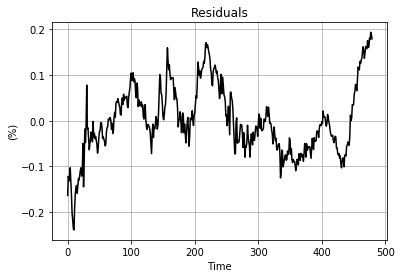

0.5220317854476852

In [42]:
# Engle Granger Cointegration Test

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
from statsmodels.tsa.adfvalues import mackinnonp
import statsmodels.api as sm 


data=pd.read_excel('D:/ACADEMIC/TEACHING/2021/University of Westminster/Predictive Analysis/PythonCodes/sims_data.xlsx')

# Best to take the natural logarithm of the data
data['lot']=np.log(data.ot)
data['lrt']=np.log(data.rt)
data['lpt']=np.log(data.pt)
data['lmt']=np.log(data.mt)

# Engle-Granger Test

# Step 1: Estimate the Model and save the residuals
formula='lot~lrt+lpt+lmt'
reg_out=smf.ols(formula,data).fit()

resid=reg_out.resid  # saving residuals

# Plotting residuals
print ("------------------------------------------------------------")
plt.figure(1)
plt.plot(resid, color='black') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('Residuals')
plt.grid(True)
plt.show()

# Step 2: Testing unit roots in residuals. Please note the critical values reported
# with the test are not suitable for cointegration test.

coint = sm.tsa.stattools.adfuller(resid, maxlag=10, autolag='aic',regression='c', regresults=True) 

test=coint[0]

# Get approx p-value from a precomputed table (from stattools)
pvalue = mackinnonp(test, 'c', N=3) # N=3 refers to the number of variables in the model
pvalue

